<a href="https://colab.research.google.com/github/tusharbansal22/Tensorflow-Notebooks/blob/main/ANN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [2]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255,x_test/255
print(" x_train shape :",x_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
 x_train shape : (60000, 28, 28)


In [4]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [5]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0410 - accuracy: 0.9862 - val_loss: 0.0727 - val_accuracy: 0.9803
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0379 - accuracy: 0.9872 - val_loss: 0.0690 - val_accuracy: 0.9814
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0346 - accuracy: 0.9884 - val_loss: 0.0702 - val_accuracy: 0.9810
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0336 - accuracy: 0.9888 - val_loss: 0.0740 - val_accuracy: 0.9797
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0321 - accuracy: 0.9891 - val_loss: 0.0841 - val_accuracy: 0.9791
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0326 - accuracy: 0.9891 - val_loss: 0.0884 - val_accuracy: 0.9775
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0300 - accuracy: 0.9897 - val_loss: 0.0802 - val_accuracy:

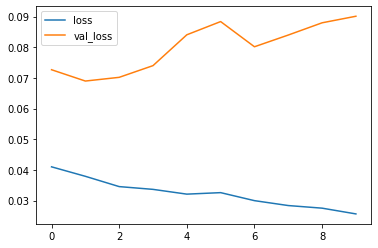

In [9]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

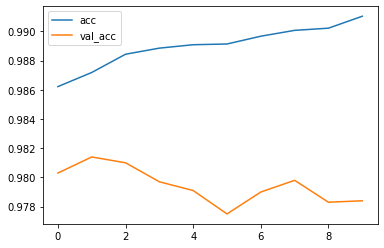

In [10]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

In [11]:
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0901 - accuracy: 0.9784
[0.09011079370975494, 0.9783999919891357]


313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[ 971    0    1    2    1    0    0    1    2    2]
 [   0 1126    3    1    0    0    1    1    3    0]
 [   3    1 1012    5    0    0    2    6    3    0]
 [   0    0    2  992    0    2    0    6    1    7]
 [   1    0    4    0  957    0    3    2    2   13]
 [   3    1    0   13    1  864    4    0    2    4]
 [   3    3    2    1    4   10  931    0    4    0]
 [   1    3   10    3    0    1    0 1004    1    5]
 [   1    0    5   10    5    3    1    4  942    3]
 [   0    2    0    4    9    2    0    7    0  985]]


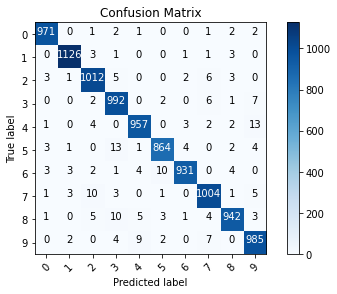

In [12]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')
  print(cm)
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)
  fmt= '.2f' if normalize else 'd'
  thresh= cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),
             horizontalalignment='center',
             color='white'if cm[i,j]>thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

Text(0.5, 1.0, 'True label: 5  Predicted label: 6')

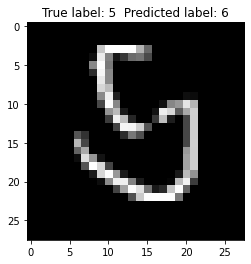

In [21]:
misclassified_idx=np.where(p_test!=y_test)[0]
i=np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title('True label: %s  Predicted label: %s'%(y_test[i],p_test[i]))